<h1 align="center">Introduction</h1>
<b>Digital payments</b> are evolving, but so are cyber criminals.

According to the Data Breach Index, <b>more than 5 million records are being stolen on a daily basis</b>, a concerning statistic that shows - fraud is still very common both for <i>Card-Present and Card-not Present type of payments</i>.

In today’s digital world where <b>trillions of Card transaction happens per day</b>, detection of fraud is challenging.

This Dataset sourced by some unnamed institute.

<h1 align="center">Feature Explanation</h1>

<b>distancefromhome</b> - the distance from home where the transaction happened.

<b>distancefromlast_transaction</b> - the distance from last transaction happened.

<b>ratiotomedianpurchaseprice</b> - Ratio of purchased price transaction to median purchase price.

<b>repeat_retailer</b> - Is the transaction happened from same retailer.

<b>used_chip</b> - Is the transaction through chip (credit card).

<b>usedpinnumber</b> - Is the transaction happened by using PIN number.

<b>online_order</b> - Is the transaction an online order.

<b>fraud</b> - Is the transaction fraudulent.

<h2 align="center">References</h2>
<ol>
    <li>https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud</li>
</ol>

<h1 align="center">1. Exploratory Analysis and Data Preparation</h1>

In [142]:
# Import libraries
import os, random, sklearn
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve

import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [16]:
# Some Basic Characteristics
SEED = 42
TEST_SIZE_DATASET__SIZE_RATIO = 0.2

random.seed = SEED
tf.random.set_seed(SEED)

DATASET_PATH = 'datasets/creditcardfraud/card_transdata.csv'
OUTPUT_PATH = 'output/'
CLASS_NAMES = ['Valid', 'Fraud']

MODEL_NAME_ANN = 'ANN'
MODEL_NAME_XGB = 'XGBClassifier'
MODEL_NAME_XGB10 = 'XGBClassifier - 10'

if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)

In [18]:
# Read dataset
df = pd.read_csv(DATASET_PATH)
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [19]:
# NA values counts
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [20]:
# Look through columns and NA values statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [21]:
# Show statistical characteristics
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


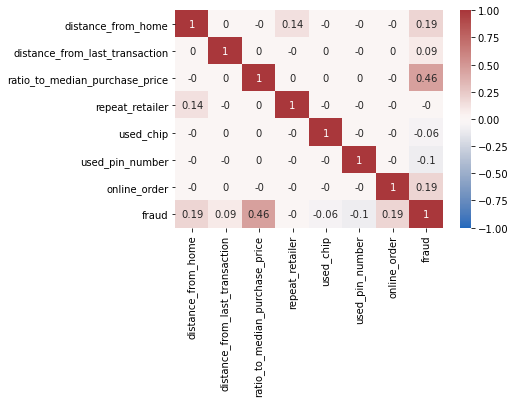

In [179]:
# Visualize linear relationships between features
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.savefig(os.path.join(OUTPUT_PATH, 'Corr-CreditCardFraudDetection.png'), dpi=300)
plt.show()

In [23]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [148]:
# Show class imbalance/data availablity
df.fraud.value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

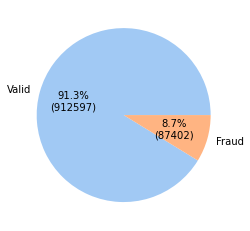

In [176]:
# Visualize class imbalance/data availablity
def func(pct, allvalues):
    absolute = int(pct / 100.0 * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = sns.color_palette('pastel')[0:5]
data_pie = list(df.fraud.value_counts())
#create pie chart
plt.pie(data_pie, labels = ['Valid', 'Fraud'], colors = colors,  
        autopct = lambda pct: func(pct, data_pie))
plt.savefig(os.path.join(OUTPUT_PATH, 'Class Imbalance Pie-CreditCardFraudDetection.png'), dpi=300)
plt.show()

In [26]:
# Specify features and target
X = df[df.columns[0:-1]].to_numpy()
Y = df[df.columns[-1]].to_numpy()

# Split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE_DATASET__SIZE_RATIO, random_state=SEED)

print('Train:', x_train.shape)
print('Test:', x_test.shape)

Train: (800000, 7)
Test: (200000, 7)


In [146]:
y_train.shape

(800000,)

In [28]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
# Define sample weights according to the class data available (class imbalance)
class_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)
class_weights.shape

(800000,)

<h1 align="center">2. Modeling</h1>

In [31]:
# Specify hyperparameters for ANN and CNN
EPOCHS = 200
callback = EarlyStopping(monitor='loss', min_delta=0.01, patience=5)
POOL_CHOICE = layers.AveragePooling2D
PADDING_CHOICE = 'valid'
KERNEL_SIZE = (5,5)
POOL_SIZE = (2,2)
ACT_FUNC = keras.activations.relu
OPT = keras.optimizers.Adam
LOSS_FUNC = keras.losses.categorical_crossentropy
METRICS = ['accuracy',
          'mse', 'mae']
#keras.metrics.Precision(), keras.metrics.Recall()

In [71]:
# Define structure of the ANN with structure 128-256-512-512-512-256-128-64-32-2
keras.backend.clear_session()    
model_ANN = models.Sequential(name = MODEL_NAME_ANN)

model_ANN.add(layers.Dense(128, input_shape = (x_train.shape[1],), activation=ACT_FUNC))
model_ANN.add(layers.Dense(256, activation=ACT_FUNC))
model_ANN.add(layers.Dense(512, activation=ACT_FUNC))
model_ANN.add(layers.Dense(512, activation=ACT_FUNC))
model_ANN.add(layers.Dense(512, activation=ACT_FUNC))
model_ANN.add(layers.Dense(256, activation=ACT_FUNC))
model_ANN.add(layers.Dense(128, activation=ACT_FUNC))
model_ANN.add(layers.Dense(64, activation=ACT_FUNC))
model_ANN.add(layers.Dense(32, activation=ACT_FUNC))
model_ANN.add(layers.Dense(2, activation='softmax'))

model_ANN.compile(optimizer = OPT(), loss = LOSS_FUNC, metrics = METRICS)
model_ANN.summary()

Model: "ANN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896   

In [ ]:
# Define two XGBClassifiers
model_xgb = XGBClassifier()
model_xgb10 = XGBClassifier(n_estimators = 10)

In [72]:
# Training ANN model
training_history_ANN = model_ANN.fit(x_train, to_categorical(y_train), epochs = EPOCHS, shuffle = True, 
                                     callbacks=[callback], verbose=1, 
                                     class_weight={0:1/sum(y_train == 0),1:1/sum(y_train == 1)})

Epoch 1/200
25000/25000 [==============================] - 276s 11ms/step - loss: 2.9642e-07 - accuracy: 0.9375 - mse: 0.0452 - mae: 0.0699
Epoch 2/200
25000/25000 [==============================] - 289s 12ms/step - loss: 1.3921e-07 - accuracy: 0.9729 - mse: 0.0206 - mae: 0.0293
Epoch 3/200
25000/25000 [==============================] - 304s 12ms/step - loss: 1.0572e-07 - accuracy: 0.9797 - mse: 0.0155 - mae: 0.0222
Epoch 4/200
25000/25000 [==============================] - 262s 10ms/step - loss: 8.7523e-08 - accuracy: 0.9838 - mse: 0.0126 - mae: 0.0180
Epoch 5/200
25000/25000 [==============================] - 290s 12ms/step - loss: 7.1982e-08 - accuracy: 0.9863 - mse: 0.0104 - mae: 0.0149
Epoch 6/200
25000/25000 [==============================] - 291s 12ms/step - loss: 6.4380e-08 - accuracy: 0.9879 - mse: 0.0092 - mae: 0.0134


<Figure size 1800x1200 with 0 Axes>

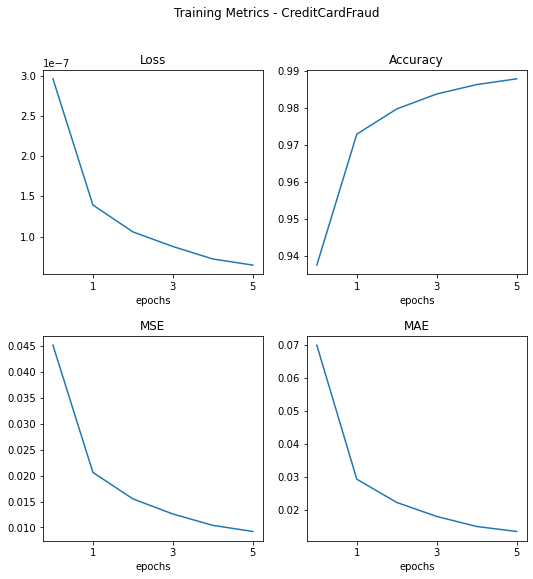

In [74]:
"""
METHOD: Show metrics obtained during each epoch in training of ANN model
The metrics are the following:
Loss - Categorical Crossentropy
Accuracy - rate of the accurate/true predictions over all predictions
MSE - Mean Squared Error
MAE - Mean Absolute Error
"""
def plot_training_history(training_history, file_name = None):
    loss_history = training_history.history['loss']
    acc_history = training_history.history['accuracy']
    mse_history = training_history.history['mse']
    mae_history = training_history.history['mae']

    # Define plot size, approximately 1024x1024 pixels 
    dpi = 300
    num_of_pixels = 1024
    num_of_inches = num_of_pixels / dpi
    cm = num_of_inches * 2.54

    plt.gcf().set_dpi(dpi)
    fig = plt.figure(figsize=(cm,cm))
    plt.subplots_adjust(hspace=0.3)
    
    axs11 = fig.add_subplot(2,2,1)
    axs12 = fig.add_subplot(2,2,2)
    axs21 = fig.add_subplot(2,2,3)
    axs22 = fig.add_subplot(2,2,4)
    
    fig.suptitle('Training Metrics - ' + file_name if file_name is not None else '')

    x_ticks = np.arange(1, len(loss_history), 2)
    for axs in (axs11, axs12, axs21, axs22):
        axs.set_xlabel('epochs')
        axs.set_xticks(x_ticks)
        
    axs11.plot(loss_history)
    axs11.set_title('Loss')
    axs12.plot(acc_history)
    axs12.set_title('Accuracy')
    axs21.plot(mse_history)
    axs21.set_title('MSE')
    axs22.plot(mae_history)
    axs22.set_title('MAE')

    plt.show()
    # Save the figure as an image if specified 
    if file_name is not None:
        fig.savefig(os.path.join(OUTPUT_PATH, 'Training Metrics - ' + file_name + '.jpg'))
        
plot_training_history(training_history_ANN, file_name='CreditCardFraud')

In [215]:
print('Training XGB ...')
model_xgb.fit(x_train, y_train, sample_weight=class_weights)

print('Training XGB with 10 Trees...')
model_xgb10.fit(x_train, y_train, sample_weight=class_weights)

Training XGB ...
Training XGB with 10 Trees...


<h1 align="center">3. Results Analysis</h1>

In [284]:
"""
METHOD: Show evaluation metrics over TEST data & estimate confusion matrix
The metrics are the following: Precision, Recall, F1-Score, Support.
"""
def conf_matrix_and_classification_report(y_true, y_pred, num_of_classes = 10, class_names = None):
    if class_names is None:
        class_names = [str(i) for i in range(num_of_classes)]
    
    conf_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred)
    for i in range(len(conf_matrix)):
        print(class_names[i] + ':', conf_matrix[i])
    print('-----------------------------------------------------')
    # Print the precision and recall, among other metrics
    print(sklearn.metrics.classification_report(y_true, y_pred, target_names = class_names)) # output_dict=True, for not rounding

In [285]:
print(f'Detailed Training Results of {MODEL_NAME_ANN} model')
y_pred_1hot_ann = model_ANN.predict(x_test)
y_pred_ann = np.argmax(y_pred_1hot_ann, axis = 1)
conf_matrix_and_classification_report(y_test, y_pred_ann, class_names=CLASS_NAMES)

print()

print(f'Detailed Training Results of {MODEL_NAME_XGB10} model')
y_pred_1hot_xgb10 = model_xgb10.predict_proba(x_test)
y_pred_xgb10 = np.argmax(y_pred_1hot_xgb10, axis = 1)
conf_matrix_and_classification_report(y_test, y_pred_xgb10, class_names=CLASS_NAMES)

print()

print(f'Detailed Training Results of {MODEL_NAME_XGB} model')
y_pred_1hot_xgb = model_xgb.predict_proba(x_test)
y_pred_xgb = np.argmax(y_pred_1hot_xgb, axis = 1)
conf_matrix_and_classification_report(y_test, y_pred_xgb, class_names=CLASS_NAMES)

Detailed Training Results of ANN model
Valid: [175996   6561]
Fraud: [    4 17439]
-----------------------------------------------------
              precision    recall  f1-score   support

       Valid       1.00      0.96      0.98    182557
       Fraud       0.73      1.00      0.84     17443

    accuracy                           0.97    200000
   macro avg       0.86      0.98      0.91    200000
weighted avg       0.98      0.97      0.97    200000


Detailed Training Results of XGBClassifier - 10 model
Valid: [182537     20]
Fraud: [    2 17441]
-----------------------------------------------------
              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00    182557
       Fraud       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


Detailed Training Results of XGBClassifier model
Valid:

In [289]:
# Calculate some metrics: Area Under Curve, Accuracy
# Prepare metrics for Receiver Operating Characteristics and Precision on Recall curves

y_test_1hot = to_categorical(y_test)
y_test_prob = y_test_1hot[:,1]
y_pred_prob_ann, y_pred_prob_xgb10, y_pred_prob_xgb = y_pred_1hot_ann[:,1], y_pred_1hot_xgb10[:,1], y_pred_1hot_xgb[:,1]


fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test_prob, y_pred_prob_ann)
fpr_xgb10, tpr_xgb10, thresholds_xgb10 = roc_curve(y_test_prob, y_pred_prob_xgb10)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_prob, y_pred_prob_xgb)

precision_ann, recall_ann, thresholds_ann = precision_recall_curve(y_test_prob, y_pred_prob_ann)
precision_xgb10, recall_xgb10, thresholds_xgb10 = precision_recall_curve(y_test_prob, y_pred_prob_xgb10)
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test_prob, y_pred_prob_xgb)

auc_ann = auc(fpr_ann, tpr_ann)
auc_xgb10 = auc(fpr_xgb10, tpr_xgb10)
auc_xgb = auc(fpr_xgb, tpr_xgb)

acc_ann = metrics.accuracy_score(y_test, y_pred_ann)
acc_xgb10 = metrics.accuracy_score(y_test, y_pred_xgb10)
acc_xgb = metrics.accuracy_score(y_test, y_pred_xgb)

In [290]:
# Show ACC and AUC for models
row1 = [acc_ann, auc_ann]
row2 = [acc_xgb, auc_xgb]
row3 = [acc_xgb10, auc_xgb10]
df_metrics = pd.DataFrame(np.array([row1, row2, row3]), columns=['Accuracy', 'AUC'])
df_metrics.index = [MODEL_NAME_ANN, MODEL_NAME_XGB, MODEL_NAME_XGB10]
df_metrics

,Accuracy,AUC
ANN,0.967175,0.995712
XGBClassifier,0.999985,1.000000
XGBClassifier - 10,0.999890,0.999998


In [293]:
class LengthsDoNotMatchException(Exception):
    def __init__(self, length1, length2):
        message = f'Lengths of arrays do not match: {length1} vs {length2}'
        super().__init__(message)

"""
METHOD: Show metrics obtained In Testing WITH COMPARISONS OVER DIFFERENT MODELS
Curves - ROC and Precision on Recall
Metrics - AUC
"""
def plot_roc_pr_curve(roc_results, pr_results, model_names, file_name = None):
    if not (len(roc_results) == len(pr_results) and len(pr_results) == len(model_names)):
        raise LengthsDoNotMatchException(len(training_histories), len(model_names))

    # Define plot size, approximately 1024x1024 pixels 
    dpi = 300
    num_of_pixels = 1024
    num_of_inches = num_of_pixels / dpi
    cm = num_of_inches * 2.54

    plt.gcf().set_dpi(dpi)
    fig = plt.figure(figsize=(cm,cm))
    plt.subplots_adjust(hspace=0.3)

    axs11 = fig.add_subplot(2,1,1)
    axs21 = fig.add_subplot(2,1,2)

    fig.suptitle('Training Metrics - ' + file_name if file_name is not None else '')

    axs11.set_xlabel('False Positive Rate')
    axs11.set_ylabel('True Positive Rate')
    axs21.set_xlabel('Recall')
    axs21.set_ylabel('Precision')
    
    for i in range(len(roc_results)):
        axs11.plot(roc_results[i][0], roc_results[i][1], label = model_names[i])
        axs21.plot(pr_results[i][0], pr_results[i][1], label = model_names[i][:model_names[i].find('(')])

    axs11.set_title('Receiver Operating Characteristics')
    axs21.set_title('Precision on Recall')

    axs11.legend()
    axs21.legend()
    plt.show()
    
    # Save the figure as an image if specified 
    if file_name is not None:
        fig.savefig(os.path.join(OUTPUT_PATH, 'Training Metrics - ' + file_name + '.jpg'))

<Figure size 1800x1200 with 0 Axes>

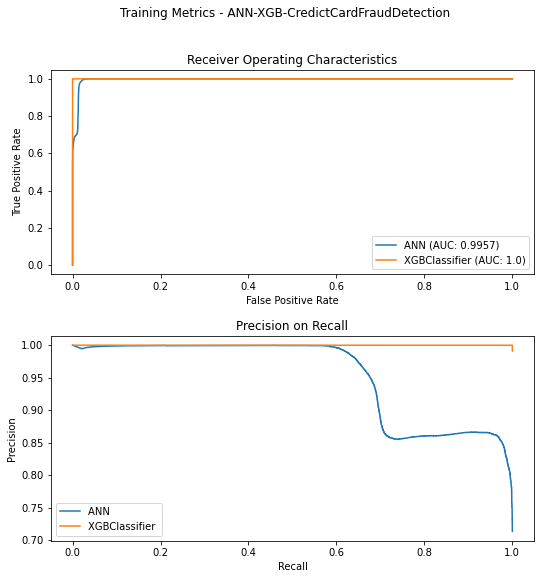

In [294]:
# Plot ROC and Precision on Recall curves
roc_results_ann_xgb = [(fpr_ann, tpr_ann), (fpr_xgb, tpr_xgb)]
pr_results_ann_xgb = [(recall_ann, precision_ann), (recall_xgb, precision_xgb)]

plot_roc_pr_curve(roc_results=roc_results_ann_xgb, 
                  pr_results=pr_results_ann_xgb,
                 model_names=[MODEL_NAME_ANN + f' (AUC: {round(auc_ann, 4)})', MODEL_NAME_XGB + f' (AUC: {round(auc_xgb, 4)})'], 
                  file_name='ANN-XGB-CredictCardFraudDetection')

In [218]:
PROBLEM_NAME = 'CreditCardFraudDetection'
model_xgb.save_model(os.path.join(OUTPUT_PATH, f"model_xgb100-{PROBLEM_NAME}.json"))
model_xgb10.save_model(os.path.join(OUTPUT_PATH, f"model_xgb10-{PROBLEM_NAME}.json"))
model_ANN.save(os.path.join(OUTPUT_PATH, f"model_ann-{PROBLEM_NAME}"))

INFO:tensorflow:Assets written to: output/model_ann-CreditCardFraudDetection\assets
